In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%%time
df_original = pd.read_csv('data/train_ver2.csv',
                 dtype={'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str,
                        'antiguedad': str, 'ult_fec_cli_1t': str, 'indext': str, 'conyuemp': str},
                 parse_dates=['fecha_dato', 'fecha_alta'])

CPU times: user 1min 26s, sys: 5.38 s, total: 1min 31s
Wall time: 1min 31s


In [6]:
df = df_original.copy() 

Se eliminan las columnas que no la mayoría de valores no están definidos

In [8]:
df.drop(['conyuemp', 'ult_fec_cli_1t'], axis=1, inplace=True)

In [9]:
df.shape

(13647309, 46)

Cantidad de valores nulos para cada columna

In [10]:
df.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado               27734
pais_residencia            27734
sexo                       27804
age                            0
fecha_alta                 27734
ind_nuevo                  27734
antiguedad                     0
indrel                     27734
indrel_1mes               149781
tiprel_1mes               149781
indresi                    27734
indext                     27734
canal_entrada             186126
indfall                    27734
tipodom                    27735
cod_prov                   93591
nomprov                    93591
ind_actividad_cliente      27734
renta                    2794375
segmento                  189368
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_fin_ult1              0
ind_ctop_fin_ult1              0
ind_ctpp_f

* `renta` tiene una buena cantidad de valores nulos

In [29]:
print("{} valores nulos que representan un {:.2f}% del total de los registros".format(df.renta.isnull().sum(),
                                                                                      df.renta.isnull().sum()*100/df.shape[0]))

2794375 valores nulos que representan un 20.48% del total de los registros


In [78]:
renta_null = df.loc[:, ['fecha_dato', 'renta', 'segmento', 'nomprov', 'ncodpers']][df.renta.isnull()]
renta_null.head()

,fecha_dato,renta,segmento,nomprov,ncodpers
4,2015-01-28,NaN,03 - UNIVERSITARIO,ZARAGOZA,1050614
8,2015-01-28,NaN,03 - UNIVERSITARIO,GIPUZKOA,1050619
11,2015-01-28,NaN,03 - UNIVERSITARIO,GIRONA,1050622
14,2015-01-28,NaN,03 - UNIVERSITARIO,ZAMORA,1050625
15,2015-01-28,NaN,03 - UNIVERSITARIO,BARCELONA,1050626


In [71]:
print("{} clientes con renta nula".format(len(renta_null.ncodpers.unique())))

247287 clientes con renta nula


In [37]:
renta_null_values = renta_null.segmento.value_counts().values
renta_null_index = renta_null.segmento.value_counts().index

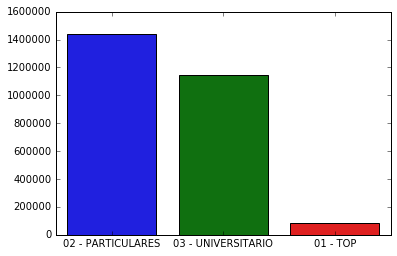

In [40]:
sns.barplot(renta_null_index, renta_null_values)

In [79]:
df_a = renta_null.loc[:, ['segmento']].join(df[df.renta.isnull()].loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
df_a = df_a.groupby(['segmento']).sum()
df_a = df_a.T

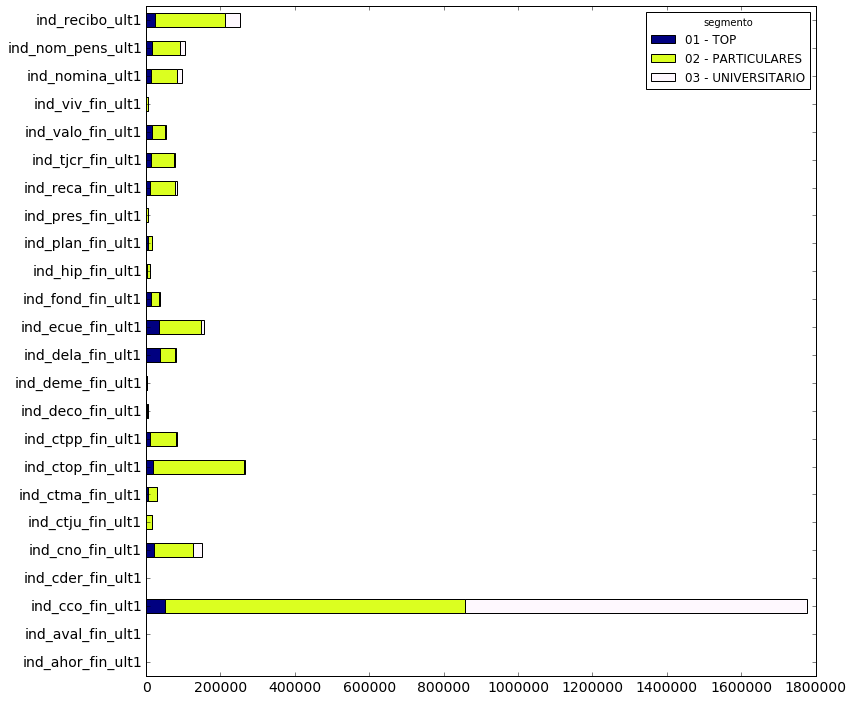

In [80]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[12,12], colormap='gist_ncar')

In [138]:
df_a = renta_null.loc[:, ['fecha_dato', 'segmento']].join(df[df.renta.isnull()].loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"])
df_a = df_a.groupby(['fecha_dato']).sum()

In [178]:
dates = [str(i).split()[0] for i in df_a.index]

In [254]:
df_b = df.loc[:, ['fecha_dato']].join(df.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]).groupby(['fecha_dato']).sum()

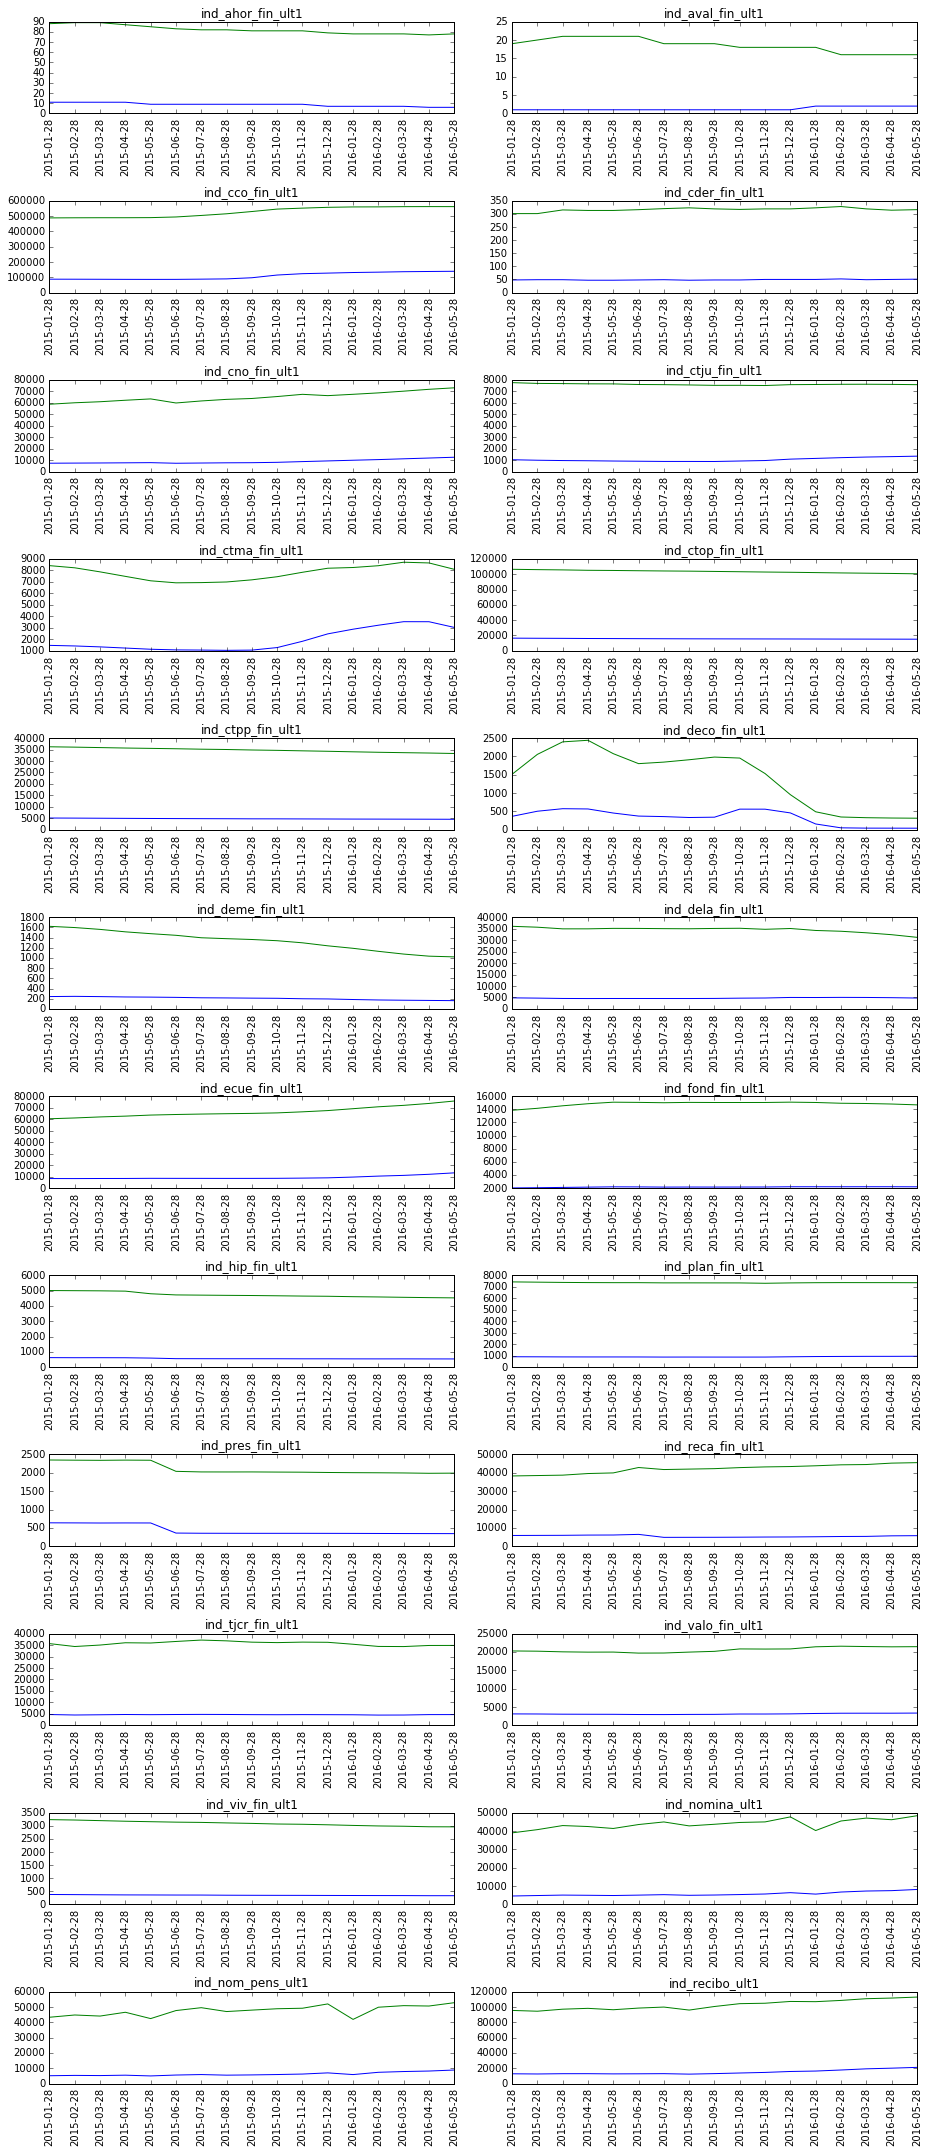

In [258]:
plt.figure(figsize=(13, 30))
for i, prod in enumerate(df_a.columns.tolist()):
    plt.subplot(12, 2, i+1)
    plt.xticks(range(len(dates)), dates, rotation=90)
    plt.plot(df_a.iloc[:, [i]].as_matrix().reshape((17)))
    plt.plot(df_b.iloc[:, [i]].as_matrix().reshape((17)))
    plt.title(prod)
plt.tight_layout()    